In [39]:
import pandas as pd
import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import Normalizer

In [40]:
student_info = {
                'profile_updated': True,
                'gre_verbal_score': 160,
                'gre_quant_score': 160,
                'gre_awa_score': 5,
                'intended_semester': 'F',
                'toefl_score': 115,
                'undergrad_gpa': 3.5,
                'intended_field': 'Computer Science',
                'intended_degree': 'MS' 
            }
college_name = 'Carnegie Mellon University'

In [41]:
data_file_path = 'data\\processed.csv'

data = pd.read_csv(data_file_path, header=0)
data.head()


,Unnamed: 0,toeflScore,greV,greQ,greA,cgpa,cgpaScale,univName
0,0,112,160,167,4.5,0.8500,10,Worcester Polytechnic Institute
1,2,94,146,157,3.0,0.7828,100,Worcester Polytechnic Institute
2,4,81,148,170,2.5,0.5700,100,Worcester Polytechnic Institute
3,6,104,150,161,4.5,0.6220,100,Worcester Polytechnic Institute
4,7,95,147,156,3.0,0.5200,100,Worcester Polytechnic Institute


In [42]:
len(data)
# removing unis with low frequencies
# column = 'univName'
# minimum_frequency = 2580
# data = data[data.groupby(column)[column].transform('count').ge(minimum_frequency)]

# # data = data.drop('Degree', 1)
# data = data.drop('Decision', 1)
# data = data.drop('Season', 1)



data

,Unnamed: 0,toeflScore,greV,greQ,greA,cgpa,cgpaScale,univName
0,0,112,160,167,4.5,0.8500,10,Worcester Polytechnic Institute
1,2,94,146,157,3.0,0.7828,100,Worcester Polytechnic Institute
2,4,81,148,170,2.5,0.5700,100,Worcester Polytechnic Institute
3,6,104,150,161,4.5,0.6220,100,Worcester Polytechnic Institute
4,7,95,147,156,3.0,0.5200,100,Worcester Polytechnic Institute
...,...,...,...,...,...,...,...,...
5141,10292,116,130,170,5.0,0.8500,10,University of Southern California
5142,10295,106,151,159,3.5,0.8724,10,University of Southern California
5143,10296,109,165,170,3.5,0.6785,100,University of Southern California
5144,10297,113,159,163,3.5,0.8200,10,University of Southern California


In [43]:
all_uni_list = data['univName'].unique().tolist()
all_uni_list

['Worcester Polytechnic Institute',
 'Wayne State University',
 'Virginia Polytechnic Institute and State University',
 'University of Wisconsin Madison',
 'University of Washington',
 'University of Utah',
 'University of Texas Dallas',
 'University of Texas Austin',
 'University of Texas Arlington',
 'University of Southern California']

In [44]:
np.random.seed(42)
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
# print(test_cutoff)
test = data.loc[random_indices[1:test_cutoff]]
print(type(test))
train = data.loc[random_indices[test_cutoff:]]

train_output_data = train['univName']

train_input_data = train
train_input_data = train_input_data.drop('univName',1)
test_output_data = test['univName']
test_input_data = test
test_input_data = test_input_data.drop('univName',1)
print(train_input_data)

<class 'pandas.core.frame.DataFrame'>
      Unnamed: 0  toeflScore  greV  greQ  greA    cgpa  cgpaScale
99           173          95   138   152   3.0  0.6800         10
1501        3796          89   147   160   3.0  0.8460         10
3994        8899         108   154   160   3.5  0.7300        100
2906        5500          86   149   159   3.0  0.8100        100
5111       10253         108   151   170   4.0  0.8200         10
...          ...         ...   ...   ...   ...     ...        ...
4426        9428         116   157   163   3.5  0.7714         10
466         1348         115   159   163   4.5  0.9070         10
3092        5721         109   130   170   3.5  0.0000          0
3772        8368          95   151   163   3.0  0.8200         10
860         2723         114   166   170   4.5  0.9580         10

[4117 rows x 7 columns]


In [45]:
def label_uni(college_name):
    index = all_uni_list.index(college_name)
    initial_list = [0]*len(all_uni_list)
    initial_list[index] = 1
    return np.array(initial_list)

In [46]:
trainlabel=[]
for i in train_output_data :
    train_labels=label_uni(i)
    trainlabel.append(train_labels)


In [47]:
trainlabel=np.array(trainlabel)
print(trainlabel.shape)

print(train_input_data.shape)
print(test_input_data.shape)

(4117, 10)
(4117, 7)
(1028, 7)


In [48]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
print(len(train_input_data.columns))
train_input_data=train_input_data.values.reshape(4117,7,1)

test_input_data=test_input_data.values.reshape(1028,7,1)

7


In [51]:
train_mean = np.mean(train_input_data, axis=0)
train_std = np.std(train_input_data, axis=0)
test_mean = np.mean(test_input_data, axis=0)
test_std = np.std(test_input_data, axis=0)

train_norm = (train_input_data - train_mean) / train_std
test_norm = (test_input_data - test_mean) / test_std

In [52]:
testlabel=[]
for i in test_output_data :
    test_labels=label_uni(i)
    testlabel.append(test_labels)
    
testlabel=np.array(testlabel)
print(testlabel.shape)
print(train_input_data.shape)

(1028, 10)
(4117, 7, 1)


In [53]:
model.fit(train_norm, trainlabel, epochs=5, verbose=1)

Epoch 1/5
129/129 [==============================] - 1s 2ms/step - loss: 1.8874 - accuracy: 0.4177
Epoch 2/5
129/129 [==============================] - 0s 2ms/step - loss: 1.1379 - accuracy: 0.6485
Epoch 3/5
129/129 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.7142
Epoch 4/5
129/129 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.7401
Epoch 5/5
129/129 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.7660


In [54]:
def call(x):
    return all_uni_list[x]

In [55]:
from numpy.random import randint
from numpy import argmax
from keras.utils.np_utils import to_categorical

score = model.evaluate(test_norm, testlabel, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
print(test_norm[1000:1001])
print('len', len(test_norm))
y = model.predict(test_norm[1000:1001])
#print(test_input_data[1:])
print(y)
m=call(np.argmax(y))
print(m)

33/33 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.7850
Test loss: 0.661713719367981
Test accuracy: 78.50194573402405
[[[ 0.75326052]
  [-1.33183846]
  [-0.90995566]
  [-0.28526469]
  [-0.12140528]
  [-1.08576708]
  [ 0.90454148]]]
len 1028
[[2.7517262e-03 2.2907662e-03 5.8351096e-04 1.0793086e-03 3.0341994e-03
  1.6955003e-03 4.9814805e-03 8.5054722e-04 8.7888706e-01 1.0384579e-01]]
University of Texas Arlington


In [56]:
from sklearn.metrics import classification_report
y_pred=model.predict(test_norm, batch_size=20, verbose=2)
report = classification_report(testlabel, y_pred.round())
print(report)

52/52 - 0s
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       1.00      0.08      0.14        26
           2       0.65      0.53      0.58        53
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.92      0.96      0.94       400
           7       1.00      0.25      0.40        32
           8       0.89      0.77      0.83       132
           9       0.92      0.97      0.95       231

   micro avg       0.90      0.73      0.81      1028
   macro avg       0.54      0.36      0.38      1028
weighted avg       0.77      0.73      0.73      1028
 samples avg       0.73      0.73      0.73      1028

C:\Users\hasee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined a

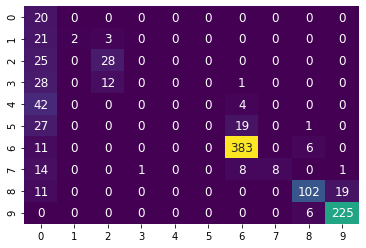

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()
draw_confusion_matrix(testlabel.argmax(axis=1), y_pred.round().argmax(axis=1))

In [65]:
mean = test['Unnamed: 0'].mean()
mean

# print(test.columns)
print((test_norm[1000:1001]))

student_x = np.array([[[mean], [120], [140], [140], [4.5], [3.6], [4] ]])
student_norm = (student_x - test_mean) / test_std
print(student_norm)


[[[ 0.75326052]
  [-1.33183846]
  [-0.90995566]
  [-0.28526469]
  [-0.12140528]
  [-1.08576708]
  [ 0.90454148]]]
[[[ 0.        ]
  [ 1.61764229]
  [-1.01337571]
  [-1.73658514]
  [ 0.08375301]
  [15.99267465]
  [-1.21657982]]]


In [59]:
test_norm[1000:1001]
print(test_norm[1000:1001].tolist())
print(norm_X)

[[[0.753260524234086], [-1.331838460299905], [-0.9099556556205362], [-0.2852646907601703], [-0.12140527517771438], [-1.0857670805890403], [0.9045414845494136]]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [67]:

y = model.predict(student_norm)
#print(test_input_data[1:])

print(y)
m=call(np.argmax(y))
print(m)

[[2.4391736e-07 4.4389716e-07 2.7358810e-06 1.0155192e-04 8.6971504e-06
  5.0324207e-04 9.8405737e-01 1.8632783e-04 1.5078413e-02 6.0949256e-05]]
University of Texas Dallas
